# Stock Analysis

## Getting and Cleaning Data
I want to analyze stocks that have a ~15% day-over-day price increase and see if we can predict which stocks will pop.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import os
from datetime import date
import time
from matplotlib import pyplot as plt
import seaborn as sns

## Getting Data
We want to analyze all stocks on the NYSE. We will use historic daily trading data for the last 5 years. If the stock has not been publically traded in the last 10 years then we will subset them out.

All publicly traded stock list was gathered from the sec website here: 'https://www.sec.gov/include/ticker.txt'

Once this is done we can load in the ticker data.

In [2]:
# get ticker list
url = 'https://www.sec.gov/include/ticker.txt'
r = requests.get(url, allow_redirects=True)


In [3]:
# filter out only the tickers
stock_tickers = r.text.split()
all_nyse_stock_tickers = []
for ticker in stock_tickers:
    if not ticker.isnumeric():
        all_nyse_stock_tickers.append(ticker)
print(all_nyse_stock_tickers)



['aapl', 'msft', 'brk-b', 'unh', 'jnj', 'v', 'tsm', 'xom', 'wmt', 'spy', 'jpm', 'pg', 'nvda', 'lvmuy', 'ma', 'cvx', 'tsla', 'lly', 'hd', 'bac', 'pfe', 'ko', 'abbv', 'baba', 'nvo', 'pep', 'cost', 'mrk', 'tmo', 'avgo', 'dhr', 'dis', 'tm', 'mcd', 'asml', 'orcl', 'abt', 'csco', 'nvs', 'azn', 'tmus', 'wfc', 'acn', 'vz', 'nee', 'nke', 'ups', 'bmy', 'ms', 'cmcsa', 'crm', 'cop', 'txn', 'adbe', 'pm', 'lin', 'unp', 'qcom', 'ry', 'schw', 'cvs', 'bhp', 'tte', 'low', 'amgn', 'rtx', 'asti', 'hsbc', 'hdb', 'mdt', 'hon', 'td', 'axp', 't', 'intu', 'intc', 'eqnr', 'ul', 'qqq', 'lmt', 'pypl', 'ibm', 'amt', 'gs', 'de', 'sbux', 'nflx', 'bp', 'sny', 'deo', 'sap', 'cat', 'adp', 'rtntf', 'c', 'ci', 'blk', 'jd', 'amd', 'cslly', 'bti', 'sony', 'rio', 'el', 'ba', 'now', 'pbr', 'pld', 'bud', 'pdd', 'syk', 'enb', 'cni', 'spgi', 'mdlz', 'cb', 'so', 'duk', 'gild', 'ibn', 'bkng', 'abnb', 'mmc', 'tgt', 'amat', 'gsk', 'adi', 'tjx', 'mo', 'bam', 'noc', 'regn', 'infy', 'ge', 'glncy', 'zts', 'isrg', 'eadsy', 'pgr', 'bdx',

Now we have the ticker lists, let's get the high level company information from yahoo finance api. 

In [7]:
company_details_to_keep = ['country', 'industry', 'sector', 'longBusinessSummary', 'industryDisp', 
                           'marketCap', 'sharesOutstanding', 'exchange', 'symbol', 'firstTradeDateEpochUtc']

def get_company_information(ticker):
    ticker = ticker.upper()
    print(f'Getting information on {ticker} ticker')
    try:
        yahoo_finance_company_object = yf.Ticker(ticker)
    except:
        print(f'{ticker} failed to get data')
    company_overview_information = []
    for company_info in company_details_to_keep:
        try:
            company_overview_information.append(yahoo_finance_company_object.info.get(company_info))
        except:
            company_overview_information.append(np.nan)
    return company_overview_information

In [9]:
# testing function
results = get_company_information(all_nyse_stock_tickers[0])
results

Getting information on AAPL ticker


['United States',
 'Consumer Electronics',
 'Technology',
 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original

In [11]:
# define function to loop through all tickers and get company information
def get_all_company_details(ticker_list_of_all_stocks):
    all_company_overviews = [get_company_information(ticker) for ticker in ticker_list_of_all_stocks]
    return all_company_overviews

In [12]:
# get data
all_public_stock_data_overviews = get_all_company_details(all_nyse_stock_tickers)

Getting information on AAPL ticker
Getting information on MSFT ticker
Getting information on BRK-B ticker
Getting information on UNH ticker
Getting information on JNJ ticker
Getting information on V ticker
Getting information on TSM ticker
Getting information on XOM ticker
Getting information on WMT ticker
Getting information on SPY ticker
Getting information on JPM ticker
Getting information on PG ticker
Getting information on NVDA ticker
Getting information on LVMUY ticker
Getting information on MA ticker
Getting information on CVX ticker
Getting information on TSLA ticker
Getting information on LLY ticker
Getting information on HD ticker
Getting information on BAC ticker
Getting information on PFE ticker
Getting information on KO ticker
Getting information on ABBV ticker
Getting information on BABA ticker
Getting information on NVO ticker
Getting information on PEP ticker
Getting information on COST ticker
Getting information on MRK ticker
Getting information on TMO ticker
Getting i

Getting information on SAN ticker
Getting information on LHX ticker
Getting information on EDU ticker
Getting information on ADSK ticker
Getting information on AZO ticker
Getting information on LULU ticker
Getting information on COF ticker
Getting information on FCX ticker
Getting information on LNG ticker
Getting information on APH ticker
Getting information on NGG ticker
Getting information on VLO ticker
Getting information on PAYX ticker
Getting information on BSBR ticker
Getting information on HMC ticker
Getting information on NXPI ticker
Getting information on STLA ticker
Getting information on KHC ticker
Getting information on BCE ticker
Getting information on EXC ticker
Getting information on ENPH ticker
Getting information on TAK ticker
Getting information on KMI ticker
Getting information on CTAS ticker
Getting information on SMFG ticker
Getting information on CRWD ticker
Getting information on E ticker
Getting information on KMB ticker
Getting information on SYY ticker
Gettin

Getting information on NET ticker
Getting information on LH ticker
Getting information on EC ticker
Getting information on TSCO ticker
Getting information on RF ticker
Getting information on DAL ticker
Getting information on RCI ticker
Getting information on BKR ticker
Getting information on TTM ticker
Getting information on PAYC ticker
Getting information on ANSS ticker
Getting information on MLM ticker
Getting information on CODYY ticker
Getting information on HBAN ticker
Getting information on MKC ticker
Getting information on DRE ticker
Getting information on URI ticker
Getting information on MRO ticker
Getting information on VICI ticker
Getting information on LYV ticker
Getting information on PFG ticker
Getting information on POAHY ticker
Getting information on FTS ticker
Getting information on WST ticker
Getting information on CNP ticker
Getting information on COIN ticker
Getting information on TSCDY ticker
Getting information on IR ticker
Getting information on MOH ticker
Gettin

Getting information on WLK ticker
Getting information on ABMD ticker
Getting information on HUBB ticker
Getting information on WRB ticker
Getting information on MAS ticker
Getting information on EQH ticker
Getting information on DOCU ticker
Getting information on AMH ticker
Getting information on HTHT ticker
Getting information on RPM ticker
Getting information on GLPI ticker
Getting information on WDC ticker
Getting information on EMRAF ticker
Getting information on CE ticker
Getting information on SSL ticker
Getting information on ERIE ticker
Getting information on PTBRY ticker
Getting information on VTRS ticker
Getting information on WTRG ticker
Getting information on Y ticker
Getting information on BOUYY ticker
Getting information on CCJ ticker
Getting information on SNA ticker
Getting information on ASX ticker
Getting information on WES ticker
Getting information on JXHLY ticker
Getting information on CEA ticker
Getting information on NI ticker
Getting information on AER ticker
Ge

Getting information on MAT ticker
Getting information on RUN ticker
Getting information on NNN ticker
Getting information on CHDN ticker
Getting information on SEIC ticker
Getting information on WAL ticker
Getting information on FIVE ticker
Getting information on CLF ticker
Getting information on YMM ticker
Getting information on OLPX ticker
Getting information on CELH ticker
Getting information on GTLS ticker
Getting information on PFGC ticker
Getting information on MIUFY ticker
Getting information on PEN ticker
Getting information on IVZ ticker
Getting information on COLD ticker
Getting information on WYNN ticker
Getting information on ACHC ticker
Getting information on SEE ticker
Getting information on PCOR ticker
Getting information on CLVT ticker
Getting information on ALSMY ticker
Getting information on GGB ticker
Getting information on PAC ticker
Getting information on S ticker
Getting information on CGNX ticker
Getting information on CHE ticker
Getting information on DLB ticker

Getting information on TREX ticker
Getting information on COUP ticker
Getting information on FCN ticker
Getting information on SLAB ticker
Getting information on PENN ticker
Getting information on TMX ticker
Getting information on SLGN ticker
Getting information on DAVA ticker
Getting information on SRC ticker
Getting information on WWE ticker
Getting information on NYT ticker
Getting information on TOL ticker
Getting information on PAGS ticker
Getting information on NTNX ticker
Getting information on ADC ticker
Getting information on LHCG ticker
Getting information on SOFI ticker
Getting information on CADE ticker
Getting information on NATI ticker
Getting information on TDOC ticker
Getting information on NTLA ticker
Getting information on PRI ticker
Getting information on AMG ticker
Getting information on AMC ticker
Getting information on SITE ticker
Getting information on GLBE ticker
Getting information on W ticker
Getting information on MKSI ticker
Getting information on EHC ticker

Getting information on DNP ticker
Getting information on ACT ticker
Getting information on ALKS ticker
Getting information on NCR ticker
Getting information on AZTA ticker
Getting information on LAZ ticker
Getting information on PGNY ticker
Getting information on ABCM ticker
Getting information on PVH ticker
Getting information on DUOL ticker
Getting information on SJI ticker
Getting information on BECN ticker
Getting information on FCFS ticker
Getting information on LPL ticker
Getting information on AMRC ticker
Getting information on DNLI ticker
Getting information on EBC ticker
Getting information on PTCT ticker
Getting information on PECO ticker
Getting information on AMBP ticker
Getting information on ALTR ticker
Getting information on MSGS ticker
Getting information on AGO ticker
Getting information on TXG ticker
Getting information on RDN ticker
Getting information on TNDM ticker
Getting information on MMS ticker
Getting information on ESGR ticker
Getting information on FLR ticke

Getting information on IBTX ticker
Getting information on GPI ticker
Getting information on PSEC ticker
Getting information on EYE ticker
Getting information on MCW ticker
Getting information on HI ticker
Getting information on SSRM ticker
Getting information on CWAN ticker
Getting information on CVET ticker
Getting information on NSIT ticker
Getting information on TAIPY ticker
Getting information on INSM ticker
Getting information on TMHC ticker
Getting information on ULCC ticker
Getting information on PEGRY ticker
Getting information on SMPL ticker
Getting information on NHI ticker
Getting information on AVA ticker
Getting information on CVT ticker
Getting information on LSPD ticker
Getting information on XRX ticker
Getting information on PSLV ticker
Getting information on LCII ticker
Getting information on VICR ticker
Getting information on TCN ticker
Getting information on NVG ticker
Getting information on IMPJY ticker
Getting information on AZEK ticker
Getting information on OFC t

Getting information on FRME ticker
Getting information on QFIN ticker
Getting information on IHS ticker
Getting information on NMRK ticker
Getting information on ZIP ticker
Getting information on PRFT ticker
Getting information on FA ticker
Getting information on TCNNF ticker
Getting information on GME ticker
Getting information on UTZ ticker
Getting information on OI ticker
Getting information on SCL ticker
Getting information on NEX ticker
Getting information on VERX ticker
Getting information on HCM ticker
Getting information on IIPR ticker
Getting information on ORC ticker
Getting information on VZIO ticker
Getting information on YY ticker
Getting information on IOSP ticker
Getting information on KEN ticker
Getting information on UPST ticker
Getting information on ETWO ticker
Getting information on NKLA ticker
Getting information on RIG ticker
Getting information on TROX ticker
Getting information on PD ticker
Getting information on UPWK ticker
Getting information on ATRC ticker
Ge

Getting information on MYGN ticker
Getting information on HOPE ticker
Getting information on CSTM ticker
Getting information on NVRO ticker
Getting information on NS ticker
Getting information on STEP ticker
Getting information on APPS ticker
Getting information on BDJ ticker
Getting information on EXTR ticker
Getting information on TGSGY ticker
Getting information on LRN ticker
Getting information on NAC ticker
Getting information on FREY ticker
Getting information on AVDX ticker
Getting information on OLK ticker
Getting information on SNEX ticker
Getting information on KAHC ticker
Getting information on MWA ticker
Getting information on FIGS ticker
Getting information on SLVM ticker
Getting information on CVII ticker
Getting information on NBTB ticker
Getting information on MNSO ticker
Getting information on WRE ticker
Getting information on PJT ticker
Getting information on INSW ticker
Getting information on VRTV ticker
Getting information on NTB ticker
Getting information on CTOS t

Getting information on CRSR ticker
Getting information on DFIN ticker
Getting information on EAT ticker
Getting information on CODI ticker
Getting information on CLMT ticker
Getting information on HNI ticker
Getting information on RILY ticker
Getting information on MEG ticker
Getting information on COHU ticker
Getting information on ETG ticker
Getting information on CHEF ticker
Getting information on NEO ticker
Getting information on KFRC ticker
Getting information on BUSE ticker
Getting information on CHCO ticker
Getting information on SAFT ticker
Getting information on LC ticker
Getting information on GVA ticker
Getting information on PTRA ticker
Getting information on BGS ticker
Getting information on FINV ticker
Getting information on DIN ticker
Getting information on JWSM ticker
Getting information on HRT ticker
Getting information on FCF ticker
Getting information on ALEX ticker
Getting information on GSM ticker
Getting information on ARKO ticker
Getting information on ATAX ticke

Getting information on LICY ticker
Getting information on PARR ticker
Getting information on ARQQ ticker
Getting information on ZUO ticker
Getting information on AXL ticker
Getting information on UEC ticker
Getting information on SXI ticker
Getting information on CRNX ticker
Getting information on DDL ticker
Getting information on NRC ticker
Getting information on MRUS ticker
Getting information on AZZ ticker
Getting information on EQX ticker
Getting information on APOG ticker
Getting information on VECO ticker
Getting information on CASH ticker
Getting information on OEC ticker
Getting information on RCKT ticker
Getting information on PRO ticker
Getting information on CCSI ticker
Getting information on DCBO ticker
Getting information on PFBC ticker
Getting information on SUMO ticker
Getting information on FMTX ticker
Getting information on DCGO ticker
Getting information on ATEN ticker
Getting information on AMCX ticker
Getting information on CNOB ticker
Getting information on MTTR ti

Getting information on VTEX ticker
Getting information on CCF ticker
Getting information on MOD ticker
Getting information on JPC ticker
Getting information on UTL ticker
Getting information on CAPL ticker
Getting information on NVTA ticker
Getting information on AMWD ticker
Getting information on TWOH ticker
Getting information on ICHR ticker
Getting information on RAPT ticker
Getting information on VTOL ticker
Getting information on NTST ticker
Getting information on KARO ticker
Getting information on MCB ticker
Getting information on GPRK ticker
Getting information on INVZ ticker
Getting information on GIII ticker
Getting information on PRDO ticker
Getting information on WINA ticker
Getting information on WRLD ticker
Getting information on ARCE ticker
Getting information on CNVY ticker
Getting information on CRBU ticker
Getting information on VEON ticker
Getting information on RPT ticker
Getting information on WKME ticker
Getting information on CARS ticker
Getting information on DIC

Getting information on MYE ticker
Getting information on SVA ticker
Getting information on BBAR ticker
Getting information on SRNE ticker
Getting information on DFFN ticker
Getting information on SLRC ticker
Getting information on HLLY ticker
Getting information on CEVA ticker
Getting information on SCVL ticker
Getting information on DENN ticker
Getting information on BBDC ticker
Getting information on LILM ticker
Getting information on OSBC ticker
Getting information on COLL ticker
Getting information on FFIC ticker
Getting information on YMAB ticker
Getting information on CPF ticker
Getting information on PGC ticker
Getting information on CFIV ticker
Getting information on NLST ticker
Getting information on CURV ticker
Getting information on MBI ticker
Getting information on RERE ticker
Getting information on VSLAX ticker
Getting information on SIBN ticker
Getting information on INGN ticker
Getting information on BIG ticker
Getting information on ALCC ticker
Getting information on CN

Getting information on LWEL ticker
Getting information on PEO ticker
Getting information on FINM ticker
Getting information on NUVB ticker
Getting information on SNRH ticker
Getting information on HHLA ticker
Getting information on ULNV ticker
Getting information on IQI ticker
Getting information on BLE ticker
Getting information on ALXO ticker
Getting information on AGAC ticker
Getting information on OLP ticker
Getting information on VIVK ticker
Getting information on WKHS ticker
Getting information on JOFF ticker
Getting information on OHPA ticker
Getting information on SKLZ ticker
Getting information on BHIL ticker
Getting information on PLCE ticker
Getting information on PDOT ticker
Getting information on MCBS ticker
Getting information on BGB ticker
Getting information on GEVO ticker
Getting information on CASS ticker
Getting information on EPHY ticker
Getting information on MBWM ticker
Getting information on HIPO ticker
Getting information on FSBC ticker
Getting information on MC

Getting information on RXRA ticker
Getting information on REPX ticker
Getting information on OFIX ticker
Getting information on MITK ticker
Getting information on ACII ticker
Getting information on VTRU ticker
Getting information on GATE ticker
Getting information on GNTY ticker
Getting information on SOL ticker
Getting information on SPGS ticker
Getting information on SLAC ticker
Getting information on COLI ticker
Getting information on ACAH ticker
Getting information on PTOC ticker
Getting information on SCLE ticker
Getting information on MYPS ticker
Getting information on MACC ticker
Getting information on IMAB ticker
Getting information on ATRA ticker
Getting information on FMIV ticker
Getting information on QSI ticker
Getting information on CALT ticker
Getting information on TRTL ticker
Getting information on AERG ticker
Getting information on HUMA ticker
Getting information on VLN ticker
Getting information on NFYS ticker
Getting information on SMBK ticker
Getting information on 

Getting information on LGTO ticker
Getting information on SMMF ticker
Getting information on QIWI ticker
Getting information on AVAH ticker
Getting information on KLAQ ticker
Getting information on SPKB ticker
Getting information on PRLD ticker
Getting information on PFIS ticker
Getting information on CLRM ticker
Getting information on LCAA ticker
Getting information on DHBC ticker
Getting information on AVNW ticker
Getting information on DNZ ticker
Getting information on CND ticker
Getting information on IPVI ticker
Getting information on HUT ticker
Getting information on APTM ticker
Getting information on ARRW ticker
Getting information on FLME ticker
Getting information on PTSI ticker
Getting information on JRI ticker
Getting information on INBK ticker
Getting information on AMPI ticker
Getting information on ALBO ticker
Getting information on TPC ticker
Getting information on HEPS ticker
Getting information on CNCN ticker
Getting information on PEI ticker
Getting information on LPT

Getting information on BCBP ticker
Getting information on SCAQ ticker
Getting information on ACMR ticker
Getting information on CMPX ticker
Getting information on ACB ticker
Getting information on FOF ticker
Getting information on RGLS ticker
Getting information on AFTR ticker
Getting information on GCI ticker
Getting information on ESQ ticker
Getting information on HWEL ticker
Getting information on OOMA ticker
Getting information on RMM ticker
Getting information on ADAL ticker
Getting information on AMRK ticker
Getting information on TRSSF ticker
Getting information on NHHS ticker
Getting information on GPP ticker
Getting information on PRTH ticker
Getting information on MSB ticker
Getting information on OIA ticker
Getting information on ASG ticker
Getting information on GECC ticker
Getting information on CZFS ticker
Getting information on TCS ticker
Getting information on AFMD ticker
Getting information on PRTS ticker
Getting information on NRAC ticker
Getting information on CRD-A 

Getting information on AVAC ticker
Getting information on OCN ticker
Getting information on ATOM ticker
Getting information on III ticker
Getting information on BBLN ticker
Getting information on SGSVF ticker
Getting information on MQT ticker
Getting information on DBD ticker
Getting information on AEF ticker
Getting information on FRW ticker
Getting information on VKTX ticker
Getting information on VHAQ ticker
Getting information on ASA ticker
Getting information on OPT ticker
Getting information on BNY ticker
Getting information on DBVT ticker
Getting information on PVBC ticker
Getting information on OTLK ticker
Getting information on KBAL ticker
Getting information on GAMB ticker
Getting information on ENER ticker
Getting information on DLCA ticker
Getting information on PRTY ticker
Getting information on EIGR ticker
Getting information on CONN ticker
Getting information on KLTR ticker
Getting information on UROY ticker
Getting information on SILC ticker
Getting information on JRS t

Getting information on THTX ticker
Getting information on MGNX ticker
Getting information on DWIN ticker
Getting information on LCNB ticker
Getting information on OB ticker
Getting information on PGRW ticker
Getting information on WLFC ticker
Getting information on INKA ticker
Getting information on FAMI ticker
Getting information on SWKH ticker
Getting information on ETX ticker
Getting information on PHIC ticker
Getting information on GER ticker
Getting information on CTR ticker
Getting information on KSI ticker
Getting information on BSVN ticker
Getting information on XELA ticker
Getting information on PTMN ticker
Getting information on LIDR ticker
Getting information on LL ticker
Getting information on UTI ticker
Getting information on SDSYA ticker
Getting information on GRPH ticker
Getting information on WISM ticker
Getting information on SPTK ticker
Getting information on EOD ticker
Getting information on VBIV ticker
Getting information on BZFD ticker
Getting information on REAL t

Getting information on QK ticker
Getting information on HYW ticker
Getting information on VBF ticker
Getting information on OMEG ticker
Getting information on PIM ticker
Getting information on OPBK ticker
Getting information on WMPN ticker
Getting information on TWN ticker
Getting information on ISBA ticker
Getting information on SAMG ticker
Getting information on PZC ticker
Getting information on VABK ticker
Getting information on ARTL ticker
Getting information on BSET ticker
Getting information on HOFT ticker
Getting information on FENC ticker
Getting information on NATR ticker
Getting information on CRNT ticker
Getting information on ALYA ticker
Getting information on LJAQ ticker
Getting information on CCLP ticker
Getting information on PLBY ticker
Getting information on PSNL ticker
Getting information on FREE ticker
Getting information on RMBI ticker
Getting information on JATT ticker
Getting information on JOF ticker
Getting information on LINC ticker
Getting information on BASI 

Getting information on AVYA ticker
Getting information on SPOK ticker
Getting information on BNED ticker
Getting information on ADRA ticker
Getting information on MSC ticker
Getting information on FTCO ticker
Getting information on BWG ticker
Getting information on ZUUS ticker
Getting information on ERLFF ticker
Getting information on BKGM ticker
Getting information on DRRX ticker
Getting information on PEBK ticker
Getting information on CAPR ticker
Getting information on MHF ticker
Getting information on IMMP ticker
Getting information on RKLY ticker
Getting information on SRT ticker
Getting information on CDRO ticker
Getting information on CAAS ticker
Getting information on OFS ticker
Getting information on CSSE ticker
Getting information on AMSC ticker
Getting information on OFED ticker
Getting information on FRAF ticker
Getting information on STTK ticker
Getting information on JYAC ticker
Getting information on CRT ticker
Getting information on ACP ticker
Getting information on MG 

Getting information on VRA ticker
Getting information on SEZNL ticker
Getting information on CHMI ticker
Getting information on PFLC ticker
Getting information on PVL ticker
Getting information on RIBT ticker
Getting information on LITB ticker
Getting information on KF ticker
Getting information on LBAO ticker
Getting information on PDSB ticker
Getting information on PHD ticker
Getting information on VATE ticker
Getting information on MGF ticker
Getting information on SFBC ticker
Getting information on CYBN ticker
Getting information on GDL ticker
Getting information on SIRC ticker
Getting information on GNSS ticker
Getting information on LAX ticker
Getting information on GAU ticker
Getting information on FVAM ticker
Getting information on UNB ticker
Getting information on ALZN ticker
Getting information on GWSO ticker
Getting information on LEE ticker
Getting information on RCAT ticker
Getting information on SUNW ticker
Getting information on INTG ticker
Getting information on ENZ tic

Getting information on XLO ticker
Getting information on GNT ticker
Getting information on OIIM ticker
Getting information on NCMI ticker
Getting information on QMCO ticker
Getting information on CIH ticker
Getting information on VIOT ticker
Getting information on GREE ticker
Getting information on NSRPF ticker
Getting information on GLU ticker
Getting information on CLGN ticker
Getting information on UPH ticker
Getting information on PNCKF ticker
Getting information on ELYM ticker
Getting information on BCRD ticker
Getting information on PMHG ticker
Getting information on DARE ticker
Getting information on HRTG ticker
Getting information on HYPR ticker
Getting information on NXC ticker
Getting information on CNTB ticker
Getting information on PGZ ticker
Getting information on HITI ticker
Getting information on IOBT ticker
Getting information on OCCI ticker
Getting information on CTSO ticker
Getting information on CRIS ticker
Getting information on QUBT ticker
Getting information on AI

Getting information on DDF ticker
Getting information on STAF ticker
Getting information on IMRA ticker
Getting information on FSEA ticker
Getting information on GLXZ ticker
Getting information on GTBP ticker
Getting information on MMNFF ticker
Getting information on ACBA ticker
Getting information on BIVI ticker
Getting information on BFI ticker
Getting information on HFBL ticker
Getting information on VENA ticker
Getting information on BNET ticker
Getting information on ICAD ticker
Getting information on WSCRF ticker
Getting information on WFCF ticker
Getting information on CBKM ticker
Getting information on APTO ticker
Getting information on EYEN ticker
Getting information on LKCRU ticker
Getting information on RUBY ticker
Getting information on DNAY ticker
Getting information on BSTG ticker
Getting information on TURN ticker
Getting information on BENH ticker
Getting information on ADAG ticker
Getting information on CBIO ticker
Getting information on PESI ticker
Getting information

Getting information on EMAN ticker
Getting information on GBOX ticker
Getting information on HVBC ticker
Getting information on IOR ticker
Getting information on EVAX ticker
Getting information on OMQS ticker
Getting information on SLS ticker
Getting information on AINC ticker
Getting information on VONI ticker
Getting information on KTCC ticker
Getting information on BMRA ticker
Getting information on TCBS ticker
Getting information on FPAY ticker
Getting information on WMLLF ticker
Getting information on ORPB ticker
Getting information on CMHF ticker
Getting information on HEOL ticker
Getting information on AGMH ticker
Getting information on MNDO ticker
Getting information on EDI ticker
Getting information on CETY ticker
Getting information on NRXP ticker
Getting information on MIGI ticker
Getting information on GANX ticker
Getting information on WAYS ticker
Getting information on HFBK ticker
Getting information on RFL ticker
Getting information on DRTT ticker
Getting information on 

Getting information on LONCF ticker
Getting information on OPFI ticker
Getting information on UTRS ticker
Getting information on RGBP ticker
Getting information on NYMX ticker
Getting information on MFBP ticker
Getting information on XFOR ticker
Getting information on TRVN ticker
Getting information on ABIO ticker
Getting information on UGRO ticker
Getting information on BASA ticker
Getting information on INTI ticker
Getting information on CGRN ticker
Getting information on FKWL ticker
Getting information on AFIB ticker
Getting information on OGEN ticker
Getting information on MDVL ticker
Getting information on APTX ticker
Getting information on CTHR ticker
Getting information on BBGI ticker
Getting information on ACTX ticker
Getting information on IDAI ticker
Getting information on RNWK ticker
Getting information on STRN ticker
Getting information on QNRX ticker
Getting information on KAVL ticker
Getting information on MCLD ticker
Getting information on CVV ticker
Getting information 

Getting information on NISN ticker
Getting information on ENZN ticker
Getting information on VQS ticker
Getting information on EZFL ticker
Getting information on HGLD ticker
Getting information on AIRI ticker
Getting information on ELTK ticker
Getting information on HALL ticker
Getting information on NRSN ticker
Getting information on NURO ticker
Getting information on HYEX ticker
Getting information on VEGYF ticker
Getting information on DGHI ticker
Getting information on AMPE ticker
Getting information on MDJH ticker
Getting information on AGE ticker
Getting information on GVP ticker
Getting information on PVCT ticker
Getting information on TLRS ticker
Getting information on KALA ticker
Getting information on WHLM ticker
Getting information on CTGL ticker
Getting information on CREG ticker
Getting information on SGTX ticker
Getting information on IHT ticker
Getting information on INDP ticker
Getting information on OVTZ ticker
Getting information on OOGI ticker
Getting information on 

Getting information on OLB ticker
Getting information on TANH ticker
Getting information on BTCS ticker
Getting information on FDLB ticker
Getting information on JSBL ticker
Getting information on DENR ticker
Getting information on OXBR ticker
Getting information on PSYBF ticker
Getting information on VRPX ticker
Getting information on VIVC ticker
Getting information on DTST ticker
Getting information on DRUG ticker
Getting information on VRVR ticker
Getting information on BIOC ticker
Getting information on INBP ticker
Getting information on NDRA ticker
Getting information on CLCS ticker
Getting information on RMSL ticker
Getting information on GXSFF ticker
Getting information on NBRV ticker
Getting information on PHGE ticker
Getting information on VYNE ticker
Getting information on SFET ticker
Getting information on UCL ticker
Getting information on CUBT ticker
Getting information on CWBR ticker
Getting information on PJXRF ticker
Getting information on USEG ticker
Getting information

Getting information on IDXG ticker
Getting information on HIHO ticker
Getting information on IMH ticker
Getting information on CUEN ticker
Getting information on PSTV ticker
Getting information on GAME ticker
Getting information on MEDS ticker
Getting information on AMBO ticker
Getting information on BCCEF ticker
Getting information on RWRDP ticker
Getting information on CSJT ticker
Getting information on RDGA ticker
Getting information on WISA ticker
Getting information on SNOA ticker
Getting information on UUU ticker
Getting information on TCNT ticker
Getting information on AVNI ticker
Getting information on COMS ticker
Getting information on MMTRS ticker
Getting information on MOBQ ticker
Getting information on ZZLL ticker
Getting information on DUSYF ticker
Getting information on LRDC ticker
Getting information on BBRW ticker
Getting information on BYOC ticker
Getting information on CLSH ticker
Getting information on UNAM ticker
Getting information on CFRX ticker
Getting informatio

Getting information on XITO ticker
Getting information on ABCP ticker
Getting information on KSPN ticker
Getting information on AEHL ticker
Getting information on BITTF ticker
Getting information on THMG ticker
Getting information on CYTR ticker
Getting information on RNWR ticker
Getting information on IVDN ticker
Getting information on COWI ticker
Getting information on EQMEF ticker
Getting information on SITS ticker
Getting information on RGMP ticker
Getting information on TCRI ticker
Getting information on AMMJ ticker
Getting information on KGKG ticker
Getting information on CRDV ticker
Getting information on SGNI ticker
Getting information on FRTG ticker
Getting information on MJHI ticker
Getting information on EFOI ticker
Getting information on ACOR ticker
Getting information on KATX ticker
Getting information on HRBK ticker
Getting information on GMVD ticker
Getting information on RCAR ticker
Getting information on CELZ ticker
Getting information on FGCO ticker
Getting informatio

Getting information on LAAB ticker
Getting information on CRKR ticker
Getting information on EESH ticker
Getting information on DBGI ticker
Getting information on UMHL ticker
Getting information on IRCC ticker
Getting information on PTZH ticker
Getting information on NPTX ticker
Getting information on USAQ ticker
Getting information on LGYV ticker
Getting information on VRSCF ticker
Getting information on USNU ticker
Getting information on UVSS ticker
Getting information on GBUX ticker
Getting information on SNBH ticker
Getting information on NTPY ticker
Getting information on EVOA ticker
Getting information on EVTN ticker
Getting information on DPWW ticker
Getting information on TMRR ticker
Getting information on AMSU ticker
Getting information on STUPF ticker
Getting information on HADV ticker
Getting information on PSSR ticker
Getting information on TCCO ticker
Getting information on PLSH ticker
Getting information on PRPS ticker
Getting information on DLYT ticker
Getting informatio

Getting information on IMII ticker
Getting information on XTRM ticker
Getting information on TOGL ticker
Getting information on AQUI ticker
Getting information on IVST ticker
Getting information on ATCC ticker
Getting information on CBGL ticker
Getting information on PACV ticker
Getting information on WTII ticker
Getting information on PDNLA ticker
Getting information on NNRX ticker
Getting information on AWON ticker
Getting information on CIRX ticker
Getting information on QDMI ticker
Getting information on PRCX ticker
Getting information on KNOS ticker
Getting information on CXDC ticker
Getting information on ETNI ticker
Getting information on TGHI ticker
Getting information on CHNC ticker
Getting information on QBAN ticker
Getting information on ADYX ticker
Getting information on MBLV ticker
Getting information on NOVC ticker
Getting information on CGLO ticker
Getting information on CDIX ticker
Getting information on GNOLF ticker
Getting information on PHOT ticker
Getting informatio

Getting information on OPLF ticker
Getting information on OFST ticker
Getting information on ODV ticker
Getting information on ODRS ticker
Getting information on OLIT ticker
Getting information on OIG ticker
Getting information on OKYO ticker
Getting information on NOVI ticker
Getting information on NOTE ticker
Getting information on NPAC ticker
Getting information on NPCT ticker
Getting information on NPFC ticker
Getting information on NPFD ticker
Getting information on NOWG ticker
Getting information on NRSAX ticker
Getting information on NRUC ticker
Getting information on NRGV ticker
Getting information on NUBI ticker
Getting information on NSTS ticker
Getting information on NTAR ticker
Getting information on NOGN ticker
Getting information on NMAI ticker
Getting information on NMCO ticker
Getting information on NLSC ticker
Getting information on NLON ticker
Getting information on NIC ticker
Getting information on NICHX ticker
Getting information on NHWK ticker
Getting information o

Getting information on ISIGN ticker
Getting information on ITAQ ticker
Getting information on ISPO ticker
Getting information on JGGC ticker
Getting information on JIA ticker
Getting information on JJOC ticker
Getting information on JPPYY ticker
Getting information on JUNS ticker
Getting information on KAL ticker
Getting information on JZ ticker
Getting information on JWAC ticker
Getting information on KACL ticker
Getting information on GTEN ticker
Getting information on GTAC ticker
Getting information on GSUN ticker
Getting information on GWAV ticker
Getting information on GWGHQ ticker
Getting information on GVAC ticker
Getting information on GVBT ticker
Getting information on GUG ticker
Getting information on GTTJ ticker
Getting information on GXLM ticker
Getting information on GXXY ticker
Getting information on GWYGU ticker
Getting information on HAC ticker
Getting information on HAIA ticker
Getting information on HIGR ticker
Getting information on HKD ticker
Getting information on 

Getting information on GJT ticker
Getting information on GIF ticker
Getting information on GGR ticker
Getting information on GHIX ticker
Getting information on GGAA ticker
Getting information on GGE ticker
Getting information on GGI ticker
Getting information on GFLD ticker
Getting information on GFGD ticker
Getting information on GENQ ticker
Getting information on GETY ticker
Getting information on GDST ticker
Getting information on GEHI ticker
Getting information on GEEX ticker
Getting information on GELS ticker
Getting information on GEMZ ticker
Getting information on GBTT ticker
Getting information on GC ticker
Getting information on GDNR ticker
Getting information on GCT ticker
Getting information on GCTK ticker
Getting information on GBTC ticker
Getting information on GBTG ticker
Getting information on GBAT ticker
Getting information on GBBK ticker
Getting information on GABC ticker
Getting information on GAMC ticker
Getting information on GAQ ticker
Getting information on FXC ti

Getting information on BIOR ticker
Getting information on BIOS ticker
Getting information on BITW ticker
Getting information on BKSW ticker
Getting information on BLCO ticker
Getting information on BLAC ticker
Getting information on BLEU ticker
Getting information on BLTE ticker
Getting information on BNGO ticker
Getting information on BMNR ticker
Getting information on BMR ticker
Getting information on BNRG ticker
Getting information on BNO ticker
Getting information on BNOW ticker
Getting information on BOC ticker
Getting information on BOCN ticker
Getting information on BRAC ticker
Getting information on BRCNF ticker
Getting information on BRCC ticker
Getting information on BRIG ticker
Getting information on BRD ticker
Getting information on BOUW ticker
Getting information on BPAC ticker
Getting information on BPYPM ticker
Getting information on BDRL ticker
Getting information on BDRY ticker
Getting information on BDS ticker
Getting information on BEKE ticker
Getting information on 

Getting information on SGLY ticker
Getting information on SGE ticker
Getting information on SGHC ticker
Getting information on SGHL ticker
Getting information on SGOL ticker
Getting information on SHAP ticker
Getting information on SHEL ticker
Getting information on SHMY ticker
Getting information on SHUA ticker
Getting information on SHPH ticker
Getting information on SIAF ticker
Getting information on SIGQ ticker
Getting information on RJAC ticker
Getting information on RLTY ticker
Getting information on RMMZ ticker
Getting information on RMRI ticker
Getting information on RMPL ticker
Getting information on ROAR ticker
Getting information on ROCL ticker
Getting information on ROTK ticker
Getting information on RPGL ticker
Getting information on RSMXF ticker
Getting information on SANB ticker
Getting information on SASI ticker
Getting information on SATL ticker
Getting information on SATT ticker
Getting information on SATX ticker
Getting information on RYTM ticker
Getting information 

Getting information on RWNFF ticker
Getting information on FNCTF ticker
Getting information on ARZGF ticker
Getting information on CAJFF ticker
Getting information on DLR-PK ticker
Getting information on CIXPF ticker
Getting information on DLR-PJ ticker
Getting information on SOJC ticker
Getting information on GNMSF ticker
Getting information on RCIAF ticker
Getting information on CKHUF ticker
Getting information on VWSYF ticker
Getting information on ERIXF ticker
Getting information on LNNGF ticker
Getting information on TEFOF ticker
Getting information on WOPEF ticker
Getting information on TSCDF ticker
Getting information on CODGF ticker
Getting information on RSTRF ticker
Getting information on AMSYF ticker
Getting information on AMCCF ticker
Getting information on POAHF ticker
Getting information on ORXCF ticker
Getting information on ATASF ticker
Getting information on LNGPF ticker
Getting information on PCRFF ticker
Getting information on TCKRF ticker
Getting information on STT-

Getting information on DFILF ticker
Getting information on MANT ticker
Getting information on AL-PA ticker
Getting information on SF-PB ticker
Getting information on UA ticker
Getting information on VLPNF ticker
Getting information on SRC-PA ticker
Getting information on SHI ticker
Getting information on SLMBP ticker
Getting information on SLFPF ticker
Getting information on FNMAN ticker
Getting information on FNMAI ticker
Getting information on TKAYF ticker
Getting information on QRTEB ticker
Getting information on FNMAG ticker
Getting information on GRPFF ticker
Getting information on WBS-PF ticker
Getting information on BCUCF ticker
Getting information on FNMFM ticker
Getting information on FNMAK ticker
Getting information on FNMAL ticker
Getting information on WTFCM ticker
Getting information on ESGRO ticker
Getting information on ISBC ticker
Getting information on PBI-PB ticker
Getting information on FNB-PE ticker
Getting information on ESGRP ticker
Getting information on GLPGF ti

Getting information on SENEB ticker
Getting information on GSS ticker
Getting information on LTRPB ticker
Getting information on DGICB ticker
Getting information on MBINP ticker
Getting information on ENRFF ticker
Getting information on BVHBB ticker
Getting information on CIO-PA ticker
Getting information on OXLCO ticker
Getting information on GMRE-PA ticker
Getting information on KOR ticker
Getting information on MUDS ticker
Getting information on LANDM ticker
Getting information on MITT-PA ticker
Getting information on BH ticker
Getting information on IGAC ticker
Getting information on SPLP-PA ticker
Getting information on GUT-PC ticker
Getting information on APYP ticker
Getting information on CORR-PA ticker
Getting information on MITT-PB ticker
Getting information on BHR-PD ticker
Getting information on VRRMW ticker
Getting information on MEOBF ticker
Getting information on THPTF ticker
Getting information on HAWLN ticker
Getting information on NCZ-PA ticker
Getting information on D

Getting information on REGRF ticker
Getting information on MLLOF ticker
Getting information on GRNF ticker
Getting information on VERBW ticker
Getting information on SDTTU ticker
Getting information on WHLRP ticker
Getting information on IGEX ticker
Getting information on IWSY ticker
Getting information on BLEG ticker
Getting information on BTZI ticker
Getting information on UNIR ticker
Getting information on FTRS ticker
Getting information on LMDCF ticker
Getting information on IMUC ticker
Getting information on VXIT ticker
Getting information on RGUS ticker
Getting information on ENCC ticker
Getting information on ASKH ticker
Getting information on PRKI ticker
Getting information on ZPAS ticker
Getting information on INCT ticker
Getting information on DROP ticker
Getting information on GENN ticker
Getting information on EWLL ticker
Getting information on JSHG ticker
Getting information on GTTNQ ticker
Getting information on PTOI ticker
Getting information on BOMH ticker
Getting infor

Getting information on STRE-WT ticker
Getting information on STET-UN ticker
Getting information on STET-WT ticker
Getting information on STIXW ticker
Getting information on SURGW ticker
Getting information on SVNAU ticker
Getting information on SVNAW ticker
Getting information on SVIX ticker
Getting information on SVFAU ticker
Getting information on SVFAW ticker
Getting information on SWETU ticker
Getting information on SWETW ticker
Getting information on SVXY ticker
Getting information on SVREW ticker
Getting information on SWVLW ticker
Getting information on SWSSU ticker
Getting information on SWSSW ticker
Getting information on SWT ticker
Getting information on SRSAU ticker
Getting information on SRSAW ticker
Getting information on SRZNW ticker
Getting information on SSAAU ticker
Getting information on SSAAW ticker
Getting information on SSPCF ticker
Getting information on SSSSL ticker
Getting information on SST-WT ticker
Getting information on SSU-WT ticker
Getting information on S

Getting information on VXX ticker
Getting information on VXZ ticker
Getting information on VYGG-UN ticker
Getting information on VYGG-WT ticker
Getting information on VWEWW ticker
Getting information on VSACU ticker
Getting information on VSACW ticker
Getting information on VSSYW ticker
Getting information on VTAQR ticker
Getting information on VTAQU ticker
Getting information on VTAQW ticker
Getting information on VTIQW ticker
Getting information on VNO-PN ticker
Getting information on VNO-PO ticker
Getting information on VPCBU ticker
Getting information on VORBW ticker
Getting information on VRSSF ticker
Getting information on VRMEW ticker
Getting information on VBOCU ticker
Getting information on VBIXD ticker
Getting information on VAL-WT ticker
Getting information on VANIW ticker
Getting information on UTAAU ticker
Getting information on UTAAW ticker
Getting information on UVXY ticker
Getting information on UVIX ticker
Getting information on UWMC-WT ticker
Getting information on UZ

Getting information on BRMK-WT ticker
Getting information on BRIVU ticker
Getting information on BRIVW ticker
Getting information on BRKHU ticker
Getting information on BRKHW ticker
Getting information on BSX-PA ticker
Getting information on BSGAR ticker
Getting information on BSGAU ticker
Getting information on BSKYU ticker
Getting information on BSKYW ticker
Getting information on BTWNU ticker
Getting information on BTWNW ticker
Getting information on BTBDW ticker
Getting information on BTMDW ticker
Getting information on BWACW ticker
Getting information on BULZ ticker
Getting information on BWAQR ticker
Getting information on BWAQU ticker
Getting information on BWBBP ticker
Getting information on BWCAW ticker
Getting information on BWNB ticker
Getting information on BW-PA ticker
Getting information on BWSN ticker
Getting information on BIOSW ticker
Getting information on BIOTU ticker
Getting information on BIOTW ticker
Getting information on BITE-UN ticker
Getting information on BIT

Getting information on ALLG-WT ticker
Getting information on ALL-PI ticker
Getting information on ALFIW ticker
Getting information on AIZN ticker
Getting information on AJXA ticker
Getting information on AKICU ticker
Getting information on AKICW ticker
Getting information on AFGD ticker
Getting information on AFGE ticker
Getting information on AFGB ticker
Getting information on AFRIW ticker
Getting information on AGBAR ticker
Getting information on AGBAW ticker
Getting information on AGCGV ticker
Getting information on AFTR-UN ticker
Getting information on AFTR-WT ticker
Getting information on AGAC-UN ticker
Getting information on AGAC-WT ticker
Getting information on AGM-PE ticker
Getting information on AGM-PF ticker
Getting information on AGM-PG ticker
Getting information on AGILW ticker
Getting information on AGGRU ticker
Getting information on AGGRW ticker
Getting information on AGNCL ticker
Getting information on AGNCO ticker
Getting information on AGNCP ticker
Getting information

Getting information on GETY-WT ticker
Getting information on GENQU ticker
Getting information on GENQW ticker
Getting information on GFGDR ticker
Getting information on GFGDU ticker
Getting information on GFAIW ticker
Getting information on FUE ticker
Getting information on FTVIU ticker
Getting information on FTVIW ticker
Getting information on FULTP ticker
Getting information on FTRSF ticker
Getting information on FTPAU ticker
Getting information on FTPAW ticker
Getting information on FTIIU ticker
Getting information on FTIIW ticker
Getting information on FSRDW ticker
Getting information on FSRXU ticker
Getting information on FSRXW ticker
Getting information on FSSIW ticker
Getting information on FSUN ticker
Getting information on FTAAU ticker
Getting information on FTAAW ticker
Getting information on FTEV-UN ticker
Getting information on FTEV-WT ticker
Getting information on FTCVU ticker
Getting information on FTCVW ticker
Getting information on FTAIN ticker
Getting information on FT

Getting information on COF-PK ticker
Getting information on COF-PL ticker
Getting information on COF-PN ticker
Getting information on COMSP ticker
Getting information on COMSW ticker
Getting information on COLIU ticker
Getting information on COLIW ticker
Getting information on CORN ticker
Getting information on COOLU ticker
Getting information on COOLW ticker
Getting information on CONXW ticker
Getting information on CORZW ticker
Getting information on CORS-UN ticker
Getting information on CORS-WT ticker
Getting information on COVAU ticker
Getting information on COVAW ticker
Getting information on COW ticker
Getting information on C-PK ticker
Getting information on C-PN ticker
Getting information on CPPTL ticker
Getting information on CPAQU ticker
Getting information on CPAQW ticker
Getting information on CPAAU ticker
Getting information on CPAAW ticker
Getting information on CPER ticker
Getting information on CPARU ticker
Getting information on CPARW ticker
Getting information on COWN

Getting information on RFACU ticker
Getting information on RFACW ticker
Getting information on REVEW ticker
Getting information on REVHU ticker
Getting information on REVHW ticker
Getting information on REVBU ticker
Getting information on REVBW ticker
Getting information on PTOCU ticker
Getting information on PTOCW ticker
Getting information on PTIXW ticker
Getting information on PTICU ticker
Getting information on PTICW ticker
Getting information on PTRCY ticker
Getting information on PTWOU ticker
Getting information on PUCKU ticker
Getting information on PUCKW ticker
Getting information on PV-UN ticker
Getting information on PV-WT ticker
Getting information on QBTS-WT ticker
Getting information on QEGYD ticker
Getting information on QFTA-UN ticker
Getting information on QFTA-WT ticker
Getting information on QNGY-WT ticker
Getting information on PWUPU ticker
Getting information on PWUPW ticker
Getting information on PW-PA ticker
Getting information on PWPPW ticker
Getting information 

Getting information on MTAL-WT ticker
Getting information on MSPRW ticker
Getting information on MSPRZ ticker
Getting information on MS-PL ticker
Getting information on MS-PO ticker
Getting information on MS-PP ticker
Getting information on MUDSW ticker
Getting information on MTVC-UN ticker
Getting information on MTVC-WT ticker
Getting information on MURFU ticker
Getting information on MURFW ticker
Getting information on MVRL ticker
Getting information on MVSTW ticker
Getting information on MYTG ticker
Getting information on MYPSW ticker
Getting information on MPRAU ticker
Getting information on MPLN-WT ticker
Getting information on MPACR ticker
Getting information on MPACW ticker
Getting information on MSFIX ticker
Getting information on MSDAU ticker
Getting information on MSDAW ticker
Getting information on MSBIP ticker
Getting information on MSACW ticker
Getting information on MONDW ticker
Getting information on MONCU ticker
Getting information on MONCW ticker
Getting information on

Getting information on MACC-UN ticker
Getting information on MACC-WT ticker
Getting information on MACAU ticker
Getting information on MACAW ticker
Getting information on METCL ticker
Getting information on MFA-PC ticker
Getting information on MET-PF ticker
Getting information on METXW ticker
Getting information on MEOAW ticker
Getting information on MER-PK ticker
Getting information on MDV-PA ticker
Getting information on MEACW ticker
Getting information on MCAER ticker
Getting information on MCAFR ticker
Getting information on MCAFU ticker
Getting information on MCACR ticker
Getting information on MCACU ticker
Getting information on MCACW ticker
Getting information on MCAAU ticker
Getting information on MCAAW ticker
Getting information on MBSC-UN ticker
Getting information on MBSC-WT ticker
Getting information on MBTCR ticker
Getting information on MBTCU ticker
Getting information on MDH-WT ticker
Getting information on MDGSW ticker
Getting information on MDRRP ticker
Getting informa

Getting information on HNPIY ticker
Getting information on HNRA-WT ticker
Getting information on HMCOU ticker
Getting information on HMCOW ticker
Getting information on HMDCF ticker
Getting information on HPP-PC ticker
Getting information on HPLTU ticker
Getting information on HPLTW ticker
Getting information on HPKEW ticker
Getting information on HORIU ticker
Getting information on HOFVW ticker
Getting information on HOMU ticker
Getting information on HWELW ticker
Getting information on HWCPZ ticker
Getting information on HTZWW ticker
Getting information on HUGS-UN ticker
Getting information on HUGS-WT ticker
Getting information on HUMAW ticker
Getting information on HYZNW ticker
Getting information on HYMCL ticker
Getting information on HYMCW ticker
Getting information on HYMCZ ticker
Getting information on HWM-P ticker
Getting information on HWKZ-WT ticker
Getting information on ICNC-UN ticker
Getting information on HZON-UN ticker
Getting information on HZON-WT ticker
Getting inform

In [13]:
# check to make sure we have imported all correct data
print(len(all_public_stock_data_overviews))
print(len(all_nyse_stock_tickers))

# convert data to a dataframe
all_public_stock_data_overviews_df = pd.DataFrame(all_public_stock_data_overviews, columns=company_details_to_keep)

12084
12084


In [68]:
# check how many companies we have missing data for
all_public_stock_data_overviews_df['symbol'].isna().sum()

0

In [69]:
# drop missing companies
all_public_stock_data_overviews_df = all_public_stock_data_overviews_df[~all_public_stock_data_overviews_df['symbol'].isna()]
# sanity check
all_public_stock_data_overviews_df['symbol'].isna().sum()

0

In [70]:
# check missing values
all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


In [71]:
all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


In [73]:
all_public_stock_data_overviews_df = all_public_stock_data_overviews_df[
    ~all_public_stock_data_overviews_df['marketCap'].isna()]
all_public_stock_data_overviews_df = all_public_stock_data_overviews_df[
    ~all_public_stock_data_overviews_df['sharesOutstanding'].isna()]

all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


In [74]:
all_public_stock_data_overviews_df[all_public_stock_data_overviews_df['symbol']=='TSLA']

,country,industry,sector,longBusinessSummary,marketCap,sharesOutstanding,exchange,symbol,firstTradeDateEpochUtc,marketCapGroup
16,United States,Auto Manufacturers,Consumer Cyclical,"Tesla, Inc. designs, develops, manufactures, l...",9.325592e+11,3.169500e+09,NMS,TSLA,1.277818e+09,large


In [75]:
all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


In [76]:
# check for duplicated companies
print(f"There are {all_public_stock_data_overviews_df.duplicated().sum()} duplicated rows")
all_public_stock_data_overviews_df[all_public_stock_data_overviews_df.duplicated()]

There are 0 duplicated rows


,country,industry,sector,longBusinessSummary,marketCap,sharesOutstanding,exchange,symbol,firstTradeDateEpochUtc,marketCapGroup


In [77]:
print(f'there are a total of {all_public_stock_data_overviews_df.industry.nunique()} unique industries')
print(f'there are a total of {all_public_stock_data_overviews_df.sector.nunique()} unique sectors')

there are a total of 148 unique industries
there are a total of 13 unique sectors


In [78]:
# check breakdown of companies in dataset
print(all_public_stock_data_overviews_df['sector'].value_counts(normalize=True))
print(all_public_stock_data_overviews_df['sector'].value_counts())

Financial Services        0.243260
Healthcare                0.191115
Technology                0.119605
Industrials               0.102519
Consumer Cyclical         0.084420
Basic Materials           0.058853
Real Estate               0.047083
Communication Services    0.046070
Energy                    0.044172
Consumer Defensive        0.042653
Utilities                 0.019997
Financial                 0.000127
Conglomerates             0.000127
Name: sector, dtype: float64
Financial Services        1922
Healthcare                1510
Technology                 945
Industrials                810
Consumer Cyclical          667
Basic Materials            465
Real Estate                372
Communication Services     364
Energy                     349
Consumer Defensive         337
Utilities                  158
Financial                    1
Conglomerates                1
Name: sector, dtype: int64


Dataset is biased towards Financial Services companies with 24.3% of companies belonging to this industry. Healthcare, Tech, and Industrial comprise between ~10-20% of the market respectively (in terms of companies listed).

In [79]:
for sector in all_public_stock_data_overviews_df.sector.unique():
    num_of_industries = all_public_stock_data_overviews_df[
        all_public_stock_data_overviews_df['sector']==sector]['industry'].nunique()
    print(f'There are {num_of_industries} industries within the {sector} sector')

There are 12 industries within the Technology sector
There are 15 industries within the Financial Services sector
There are 12 industries within the Healthcare sector
There are 8 industries within the Energy sector
There are 12 industries within the Consumer Defensive sector
There are 23 industries within the Consumer Cyclical sector
There are 7 industries within the Communication Services sector
There are 6 industries within the Utilities sector
There are 25 industries within the Industrials sector
There are 15 industries within the Basic Materials sector
There are 12 industries within the Real Estate sector
There are 1 industries within the Financial sector
There are 1 industries within the Conglomerates sector


In [80]:
# get the number of companies per industry
for sector in all_public_stock_data_overviews_df.sector.unique():
    name_of_industries = all_public_stock_data_overviews_df[
        all_public_stock_data_overviews_df['sector']==sector]['industry'].unique()
    print(sector + ":")
    for industry in name_of_industries:
        num_of_industry_companies = all_public_stock_data_overviews_df[
            all_public_stock_data_overviews_df['industry']==industry]['industry'].count()
        print(industry + ":", num_of_industry_companies)
        
    print('\n')

Technology:
Consumer Electronics: 20
Software—Infrastructure: 156
Semiconductors: 73
Semiconductor Equipment & Materials: 41
Communication Equipment: 83
Information Technology Services: 76
Software—Application: 310
Solar: 25
Electronic Components: 56
Computer Hardware: 43
Scientific & Technical Instruments: 50
Electronics & Computer Distribution: 12


Financial Services:
Insurance—Diversified: 24
Credit Services: 74
Banks—Diversified: 48
Capital Markets: 83
Banks—Regional: 479
Asset Management: 530
Financial Data & Stock Exchanges: 17
Insurance—Property & Casualty: 47
Insurance Brokers: 19
Insurance—Life: 27
Mortgage Finance: 52
Insurance—Specialty: 23
Insurance—Reinsurance: 8
Financial Conglomerates: 5
Shell Companies: 486


Healthcare:
Healthcare Plans: 13
Drug Manufacturers—General: 24
Biotechnology: 784
Diagnostics & Research: 78
Medical Devices: 180
Drug Manufacturers—Specialty & Generic: 199
Medical Instruments & Supplies: 71
Medical Care Facilities: 63
Medical Distribution: 11
P

In [81]:
print('The average number of pulicly listed companies per ',
      'industry is: ', all_public_stock_data_overviews_df['industry'].value_counts().mean())
print('The median number of pulicly listed companies per ',
      'industry is: ', all_public_stock_data_overviews_df['industry'].value_counts().median())
print('The max number of pulicly listed companies per ',
      'industry is: ', all_public_stock_data_overviews_df['industry'].value_counts().max())
print('The min number of pulicly listed companies per ',
      'industry is: ', all_public_stock_data_overviews_df['industry'].value_counts().min())

The average number of pulicly listed companies per  industry is:  53.38513513513514
The median number of pulicly listed companies per  industry is:  27.0
The max number of pulicly listed companies per  industry is:  784
The min number of pulicly listed companies per  industry is:  1


The industry with the most companies is Asset Management (389), followed by banks-regional. specialty industrial machinery , and then diagnostics & research etc. There is quite a lot of imbalance in our dataset with the industry with the most publicly listed companies containing 389, while the median number of publicly listed companies per industry is only 12. This means that any modelling that we do is going to be biased towards the financial services sector, and the Asset Management industry more specifically. 

As different sectors and industries trade differently from each other, due to the fact that they carry different valuations and growth expectations, we should be sure to control for sector and industry in our analysis.

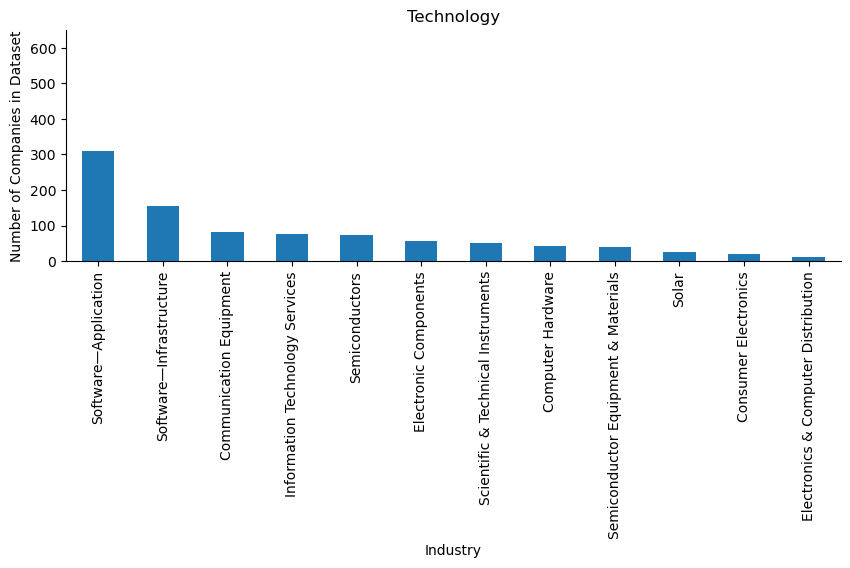

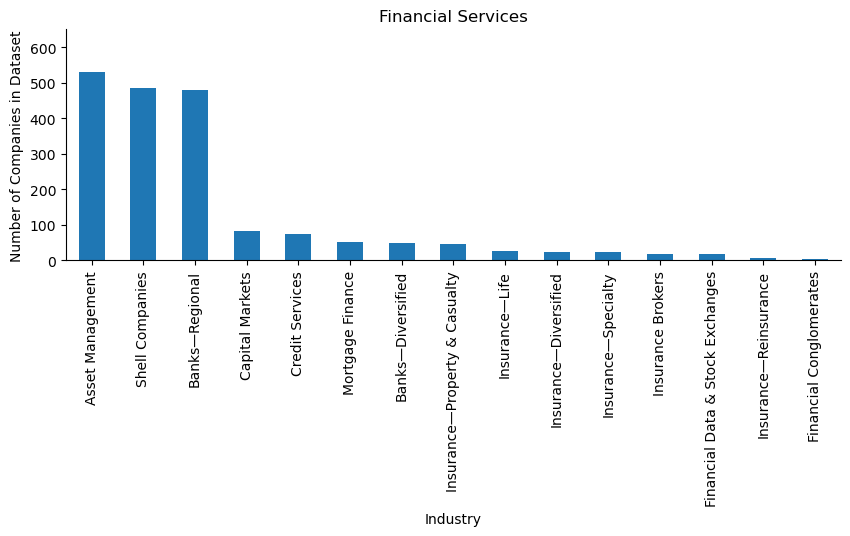

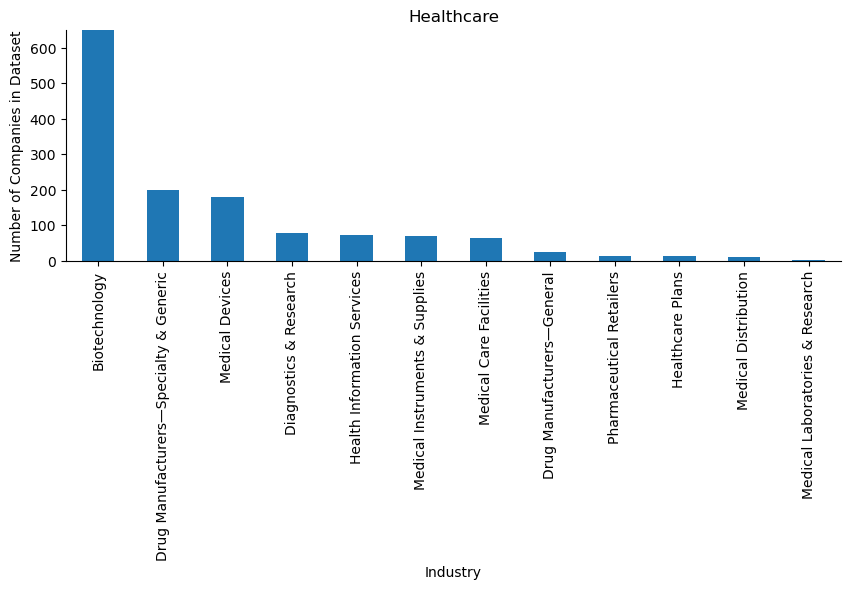

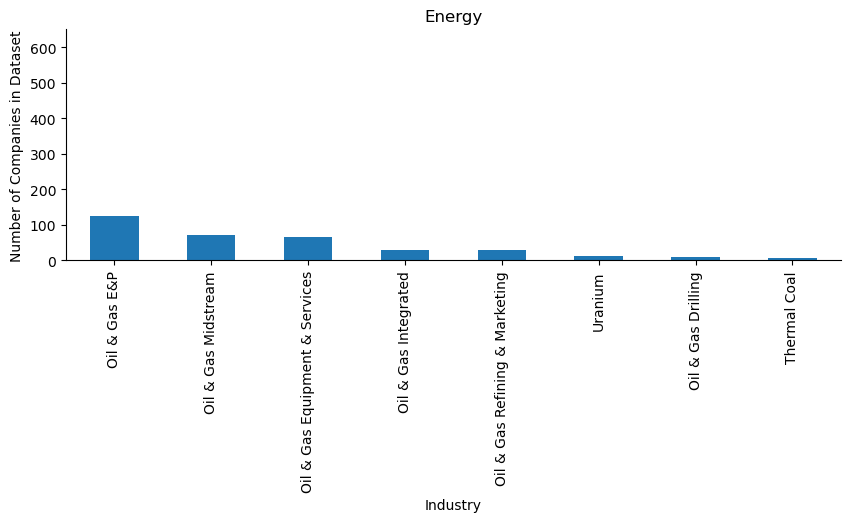

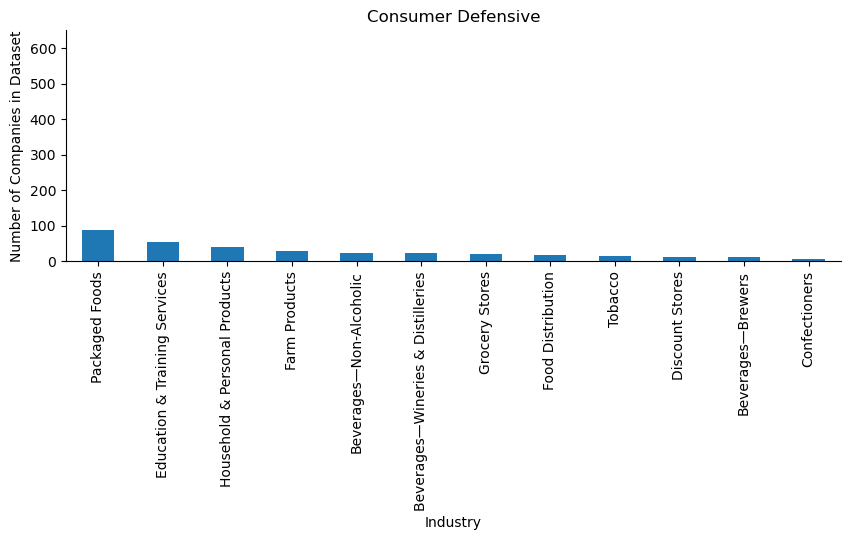

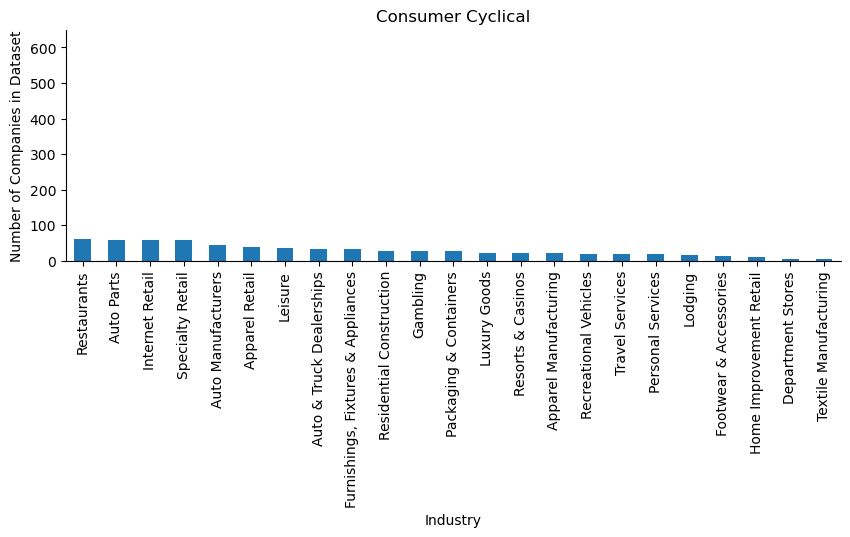

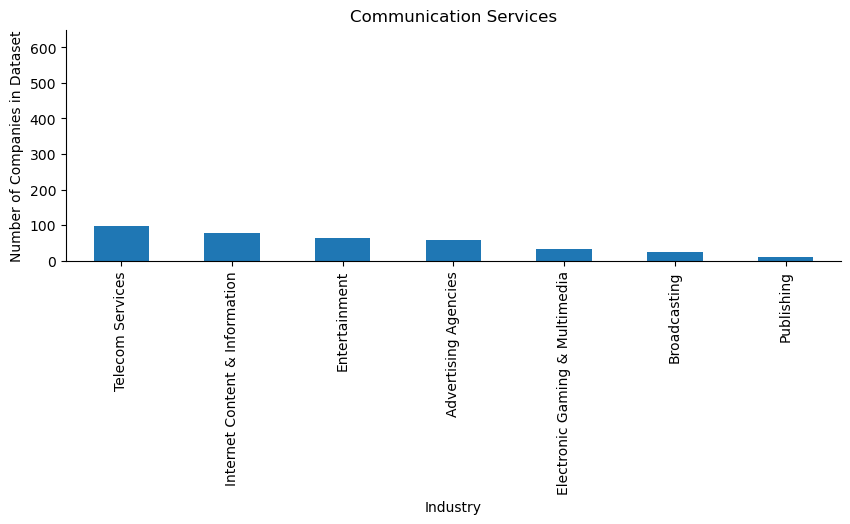

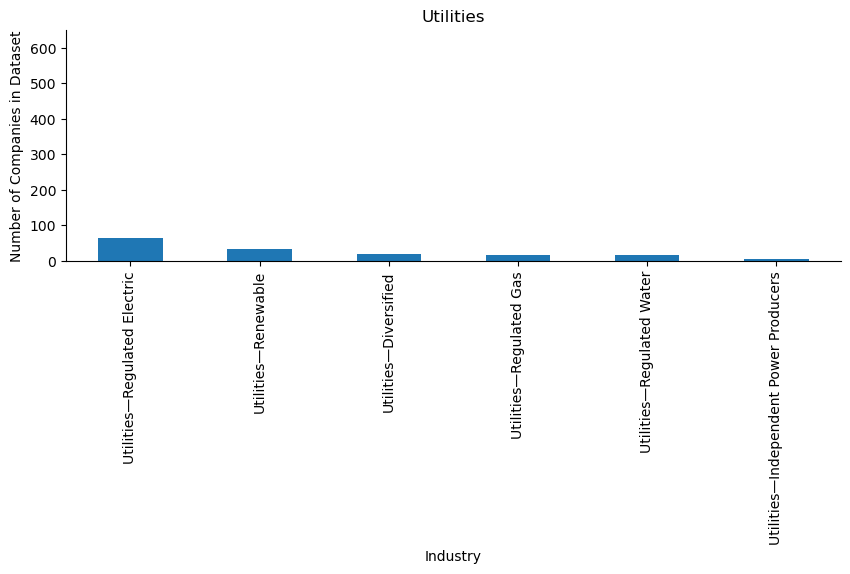

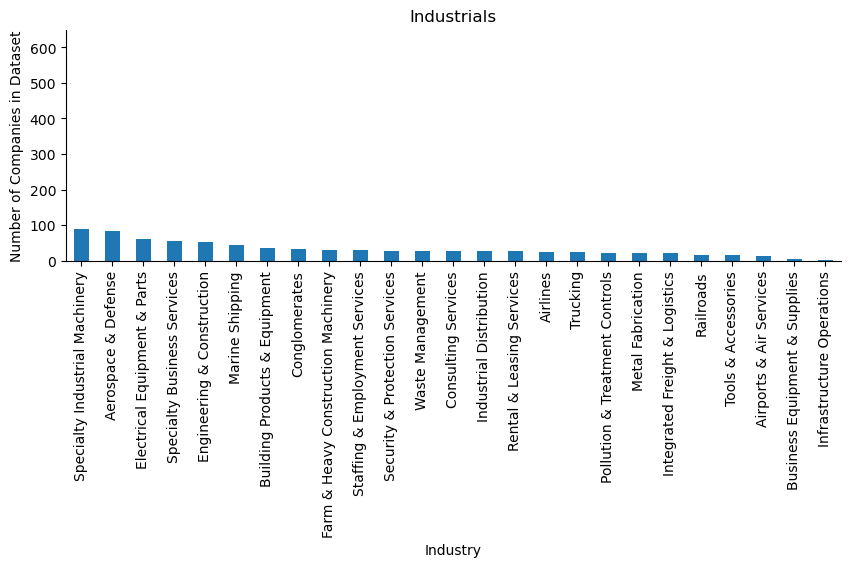

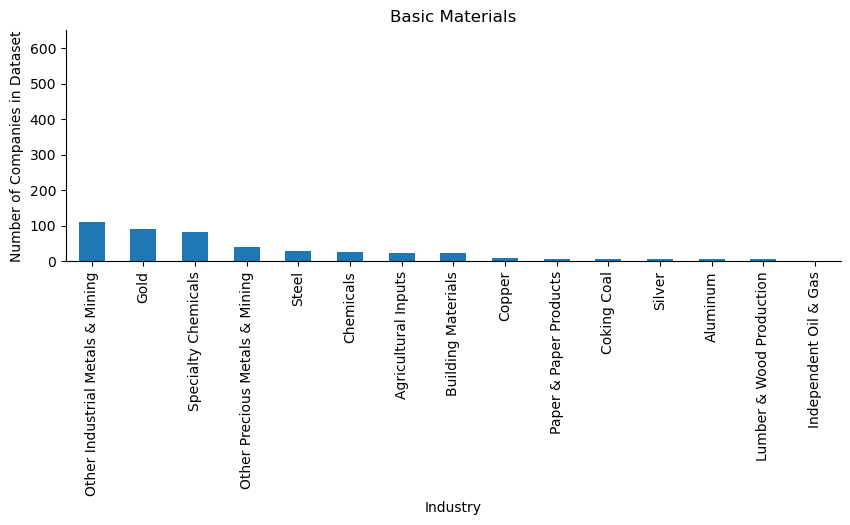

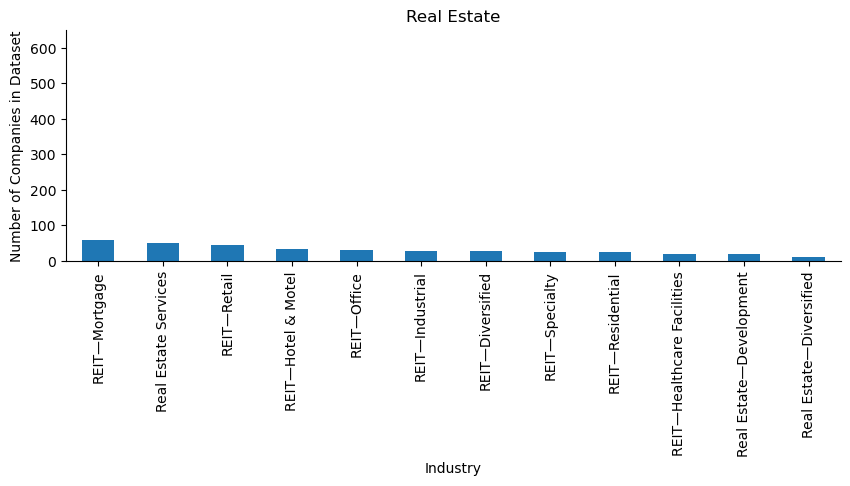

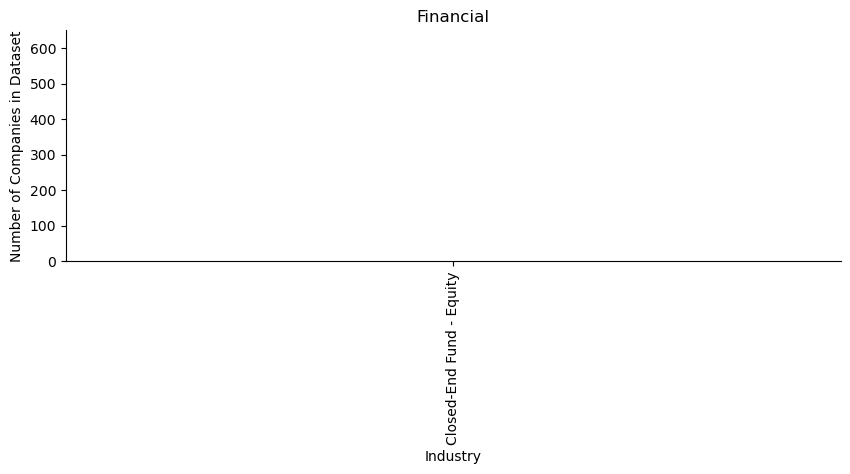

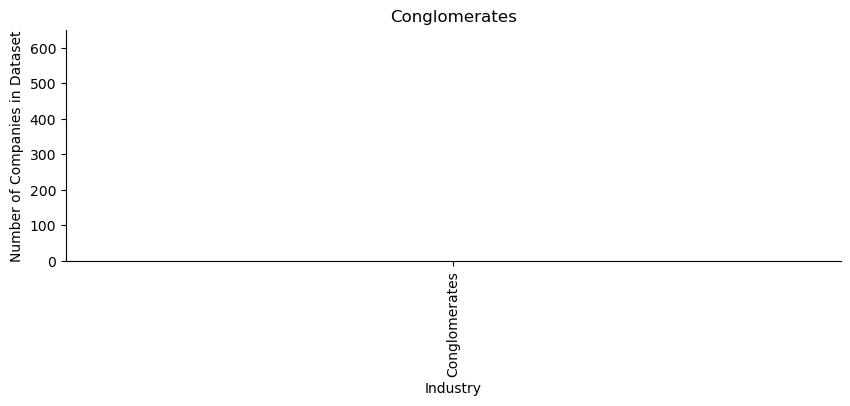

In [82]:
for sector in all_public_stock_data_overviews_df.sector.unique():
    title = sector
    sector_df = all_public_stock_data_overviews_df[all_public_stock_data_overviews_df['sector']==sector]
    plt.figure(figsize=(10,3))
    sector_df['industry'].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Industry')
    plt.ylabel('Number of Companies in Dataset')
    plt.ylim(0,650)
    sns.despine()
    plt.show()

In [83]:
all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


Our final dataset contains 2381 unique companies, with a heavy tilt towards financial companies. Let's check to see the breakdown of companies based on their marketcap.

Below is a quick breakdwon of the distribution of companies on the market based on their market cap.

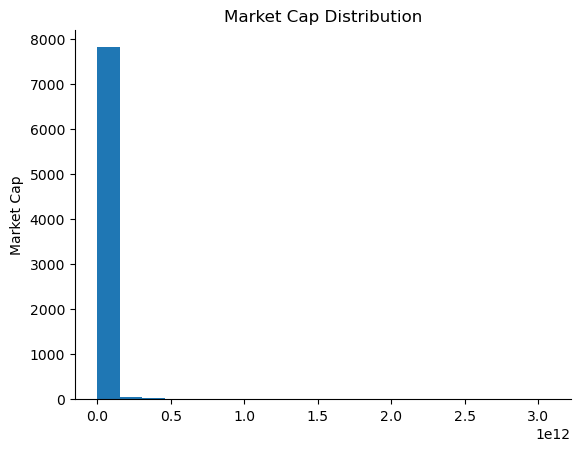

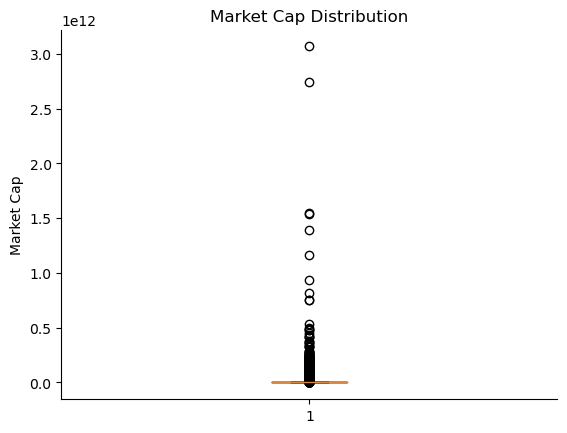

average market cap: 10136742379.23364 
 median market cap: 402374976.0, 
 max market cap: 3068669460480.0 
 min market cap: 1000750.0
total market value is 80090401538325.0
75% of companies have a market cap of 3255202560.0 or less


In [85]:
#calculate interquartile range 
q3, q1 = np.percentile(all_public_stock_data_overviews_df['marketCap'], [75 ,25])
iqr = q3 - q1
bin_width = 2 * iqr / len(all_public_stock_data_overviews_df['marketCap'])**(1/3)
hist_data = all_public_stock_data_overviews_df['marketCap']
plt.figure()
plt.hist(hist_data, bins=20)
plt.title('Market Cap Distribution')
plt.ylabel('Market Cap')
sns.despine()
plt.show()

plt.figure()
plt.boxplot(hist_data)
plt.title('Market Cap Distribution')
plt.ylabel('Market Cap')
sns.despine()
plt.show()

print(f'average market cap: {hist_data.mean()} \n median market cap: {hist_data.median()}, \n max market cap: {hist_data.max()} \n min market cap: {hist_data.min()}')
print(f'total market value is {hist_data.sum()}')
print(f'75% of companies have a market cap of {q3} or less')

let's remove the companies with a market cap less than 1,000,00

In [86]:
all_public_stock_data_overviews_df = all_public_stock_data_overviews_df[
    all_public_stock_data_overviews_df['marketCap']>1000000]

In [87]:
all_public_stock_data_overviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 12062
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 7881 non-null   object 
 1   industry                7901 non-null   object 
 2   sector                  7901 non-null   object 
 3   longBusinessSummary     7899 non-null   object 
 4   marketCap               7901 non-null   float64
 5   sharesOutstanding       7901 non-null   float64
 6   exchange                7901 non-null   object 
 7   symbol                  7901 non-null   object 
 8   firstTradeDateEpochUtc  7899 non-null   float64
 9   marketCapGroup          7901 non-null   object 
dtypes: float64(3), object(7)
memory usage: 679.0+ KB


The total market value is 80,090,401,538,325, roughly 80 trillion dollars. 

Average market cap of remaining companies is 14,279,422,092 the median market cap is 10,136,742,379 the largest company has a market cap of 3,068,669,460,480 (which is apple) and the smallest company has a market cap of 1,000,750. 

Data has a heavy positive skew with a few companies carrying monsterous valuations. 50 percent of companies have a market cap of 402,374,976 or less.

In [89]:
# company with the largest valuation is apple
all_public_stock_data_overviews_df[all_public_stock_data_overviews_df['marketCap']==3068669460480.0]

,country,industry,sector,longBusinessSummary,marketCap,sharesOutstanding,exchange,symbol,firstTradeDateEpochUtc,marketCapGroup
0,United States,Consumer Electronics,Technology,"Apple Inc. designs, manufactures, and markets ...",3.068669e+12,1.572870e+10,NMS,AAPL,345479400.0,large


To get a better sense of the market structure based on market cap, it is common to group stocks into large, mid, small, and micro market caps. Let's go ahead and group our companies based on the below cut-offs. 

* Large Cap: Market Cap above 10 billion
* Medium Cap: Between 2 billion and 10 billion
* Small Cap: Between 300 million and 2 billion
* Micro Cap: less than 300 million

In [90]:
def get_market_cap_grouping(market_cap):
    if market_cap >= 10000000000:
        return 'large'
    if market_cap >= 2000000000:
        return 'mid'
    if market_cap >= 300000000:
        return 'small'
    else:
        return 'micro'
    
all_public_stock_data_overviews_df['marketCapGroup'] = all_public_stock_data_overviews_df['marketCap'].apply(
    lambda x: get_market_cap_grouping(x))

all_public_stock_data_overviews_df

,country,industry,sector,longBusinessSummary,marketCap,sharesOutstanding,exchange,symbol,firstTradeDateEpochUtc,marketCapGroup
0,United States,Consumer Electronics,Technology,"Apple Inc. designs, manufactures, and markets ...",3.068669e+12,1.572870e+10,NMS,AAPL,3.454794e+08,large
1,United States,Software—Infrastructure,Technology,"Microsoft Corporation develops, licenses, and ...",2.745273e+12,7.435490e+09,NMS,MSFT,5.111082e+08,large
2,United States,Insurance—Diversified,Financial Services,"Berkshire Hathaway Inc., through its subsidiar...",7.509216e+11,1.309660e+09,NYQ,BRK-B,8.316486e+08,large
3,United States,Healthcare Plans,Healthcare,UnitedHealth Group Incorporated operates as a ...,4.843836e+11,9.310320e+08,NYQ,UNH,4.668678e+08,large
4,United States,Drug Manufacturers—General,Healthcare,"Johnson & Johnson, together with its subsidiar...",4.125224e+11,2.598730e+09,NYQ,JNJ,-2.523222e+08,large
...,...,...,...,...,...,...,...,...,...,...
11788,Netherlands,Internet Retail,Consumer Cyclical,Just Eat Takeaway.com N.V. operates an online ...,3.926393e+09,1.099830e+09,PNK,JTKWY,1.585143e+09,mid
11933,Hong Kong,Drug Manufacturers—Specialty & Generic,Healthcare,"HUTCHMED (China) Limited discovers, develops, ...",2.279372e+09,8.661610e+08,PNK,HMDCF,1.397741e+09,mid
12015,Hong Kong,Other Industrial Metals & Mining,Basic Materials,"Graphex Group Limited, together with its subsi...",5.000739e+07,7.815360e+08,PNK,GRFXF,1.643726e+09,micro
12033,United Kingdom,Drug Manufacturers—Specialty & Generic,Healthcare,"Haleon plc, together with its subsidiaries, en...",3.860974e+10,9.234570e+09,PNK,HLNCF,1.659015e+09,large


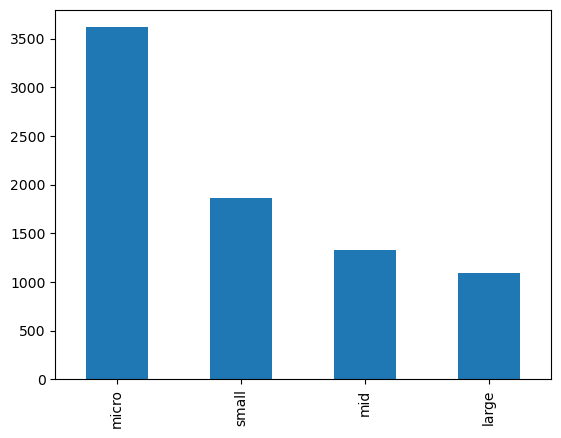

micro    3616
small    1864
mid      1325
large    1096
Name: marketCapGroup, dtype: int64

In [91]:
all_public_stock_data_overviews_df['marketCapGroup'].value_counts().plot(kind='bar')
plt.show()
all_public_stock_data_overviews_df['marketCapGroup'].value_counts()

In [92]:
def get_historic_data(ticker_list, period):
    historic_data = {}
    for ticker in ticker_list:
        company = yf.Ticker(ticker)
        try:
            historic_data[ticker] = company.history(period=period)
        except:
            print(f'error getting {ticker} data')
            historic_data[ticker] = np.nan
    return historic_data

def get_historic_data_in_bulk(ticker_list, period):
    ticker_list = list(ticker_list)
    ticker_string = " ".join(ticker_list)
    data = yf.download(ticker_string, period="5y")
    return data

In [52]:
historic_trade_data = get_historic_data(all_public_stock_data_overviews_df['symbol'], '5y')

TAIT: Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=TAIT, cluster=finance]]
BOLIF: Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=BOLIF, cluster=finance]]


In [191]:
historic_trade_data

{'AAPL':                                  Open        High         Low       Close  \
 Date                                                                        
 2018-07-20 00:00:00-04:00   45.819860   45.975156   45.435200   45.738628   
 2018-07-23 00:00:00-04:00   45.557039   45.862859   45.289452   45.779236   
 2018-07-24 00:00:00-04:00   45.979922   46.269015   45.884356   46.111328   
 2018-07-25 00:00:00-04:00   46.125670   46.553337   45.975150   46.546169   
 2018-07-26 00:00:00-04:00   46.495991   46.818533   46.257072   46.400425   
 ...                               ...         ...         ...         ...   
 2023-07-13 00:00:00-04:00  190.500000  191.190002  189.779999  190.539993   
 2023-07-14 00:00:00-04:00  190.229996  191.179993  189.630005  190.690002   
 2023-07-17 00:00:00-04:00  191.899994  194.320007  191.809998  193.990005   
 2023-07-18 00:00:00-04:00  193.350006  194.330002  192.419998  193.729996   
 2023-07-19 00:00:00-04:00  193.100006  198.220001  192.

In [62]:
historic_data_list = []
for key, value in historic_trade_data.items():
    if type(value)==pd.DataFrame:
        value['symbol'] = key
        historic_data_list.append(value)

In [63]:

historic_trade_data_df = pd.concat(historic_data_list)

In [94]:
# check to make sure there is no missing data
historic_trade_data_df['symbol'].isna().sum()

0

In [56]:
for col in historic_trade_data_df.columns:
    print(col + ":")
    print(historic_trade_data_df[col].isna().sum())

Open:
2
High:
2
Low:
2
Close:
2
Volume:
0
Dividends:
0
Stock Splits:
0
Adj Close:
8558366


In [66]:
historic_trade_data_df[historic_trade_data_df['symbol']=="GOOGL"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,Adj Close
Date,,,,,,,,,
2018-07-20 00:00:00-04:00,59.962002,60.538502,59.829498,59.894001,37938000.0,0.0,0.0,GOOGL,NaN
2018-07-23 00:00:00-04:00,59.783001,60.755001,59.600498,60.549999,65446000.0,0.0,0.0,GOOGL,NaN
2018-07-24 00:00:00-04:00,63.549999,63.750000,62.207001,62.907501,107600000.0,0.0,0.0,GOOGL,NaN
2018-07-25 00:00:00-04:00,62.631001,63.911999,62.452499,63.797001,51104000.0,0.0,0.0,GOOGL,NaN
2018-07-26 00:00:00-04:00,63.359001,64.370003,63.150002,64.275002,54686000.0,0.0,0.0,GOOGL,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-14 00:00:00-04:00,124.800003,126.779999,123.489998,125.419998,33266800.0,0.0,0.0,GOOGL,NaN
2023-07-17 00:00:00-04:00,125.940002,127.099998,124.199997,124.650002,25716200.0,0.0,0.0,GOOGL,NaN
2023-07-18 00:00:00-04:00,124.599998,124.680000,122.959999,123.760002,26226400.0,0.0,0.0,GOOGL,NaN


In [67]:
historic_trade_data_df.to_csv('historic_stock_trade_data.csv')
all_public_stock_data_overviews_df.to_csv('stock_overview_data.csv')